# 신경망
---

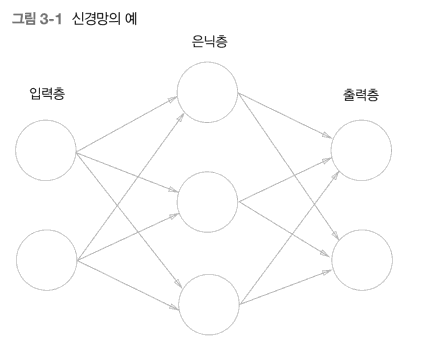

> 왼쪽부터 입력층 -> 은닉층 -> 출력층 구조
>
> 은닉층의 뉴런은 사람이 관촬 할수 없음

# 활성화 함수 등장
 
---

### 활성화 함수 이전 chapter2의 편향된 퍼센트론에 대해 설명
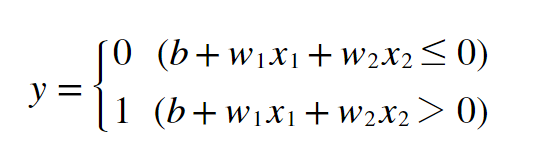
 
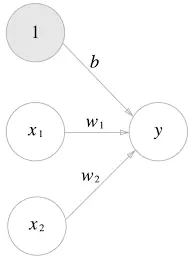
> 편향 b : 뉴런이 얼마나 쉽게 활성화되는지 제어
>> 활성화 : 뉴런이 입력을 받아 출력을 내는 상태
>
> 가중치 w : 각 신호의 영향력을 제어
>

<br>

### 활성화 함수 설명

> 입력 신호의 총합을 출력 신호로 변환하는 함수
> * 입력 신호의 총합이 활성화를 일으키는지 정하는 역할

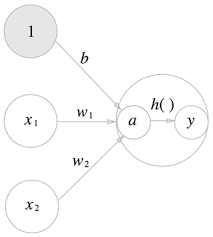

> a = b+w1w2 =+ x1w2
> y = h(a)
>> 가중치가 달린 입력 신호와 편향의 총합을 a에 저장 후, a를 함수 h()에 넣어 y를 출력

# 활성화 함수
---

> 활성화 함수는 임계값을 경계로 출력이 변경되는 계단 함수를 사용

<br>

## 시그모이드 함수

> 시그모이드를 이용해 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달하는 구조
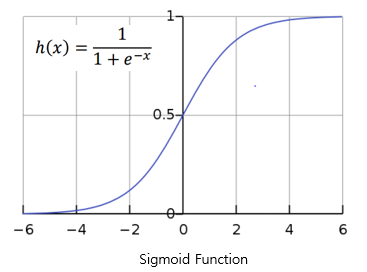
> 
> 신경망에서는 활성화 함수로 시그모이드를 사용
> 
> #### <span style="color: red;">퍼셉트론과 신경망의 주된 차이는 활성화 함수 차이</span>
>> 퍼셉트론 : 계단 함수
>> 
>> 신경망 : 시그모이드
>>
> 뉴런이 여러 층으로 이어지는 구조와 신호를 전달하는 방법은 둘 다 동일

In [19]:
# 계단 함수 구현
# 입력이 0을 넘으면 1, 그 외에는 0을 출력하는 계단 함수
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
# numpy의 배열을 인수로 넣을 수 없음

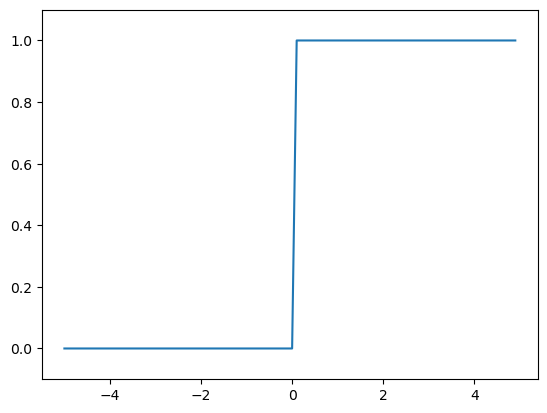

In [21]:
# 계단 함수 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int) # x가 0보다 크면 True(1), 작거나 같으면 False(0)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x) # 위에 정의한 += 0.1의 x의 값을 step_fuction에서 계산되어 y에 삽입
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

In [35]:
# 시그모이드 함수 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0,1.0,2.0])
print(sigmoid(x))

# 설명
## 출력 값이 아무리 커도 1, 아무리 작아도 0보다 작아지지 않음
## 즉 출력 값이 항상 0과 1사이 위치하여 확률처럼 해석이 가능하게 해줌

[0.26894142 0.73105858 0.88079708]


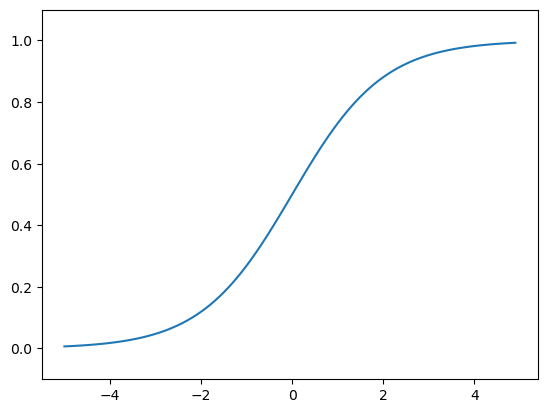

In [40]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

# ReLU(Rectified Linear Unit) 함수
---

> 계단함수와 시그모이드 함수의 주요 공통점은 비선형 함수
>> 선형 함수 : 출력값이  입력의 상수배만큼 변하는 함수
>> 비선형 함수 : 직선 1개로 그릴 수 없는 함수
>
> 최근에는 신경망에서 ReLF함수를 주로 사용함
>
> 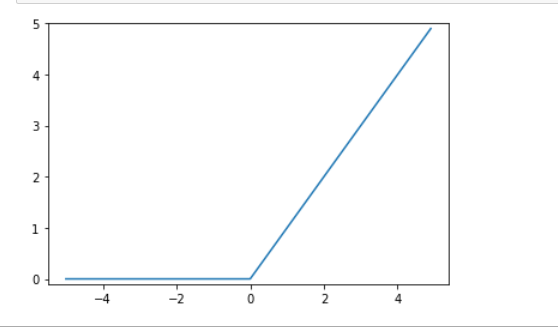
>
> 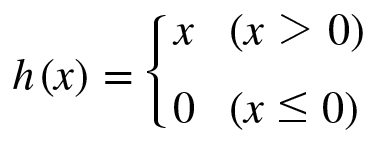
>
>  ReLU는 입력이 0을 넘으면 그대로 출력하고, 0 이하이면 0을 출력
> 

In [41]:
# ReLU 함수 출력
def relu(x):
    return np.maximum(0, x)

# 신경망에서 행렬의 곱
---

>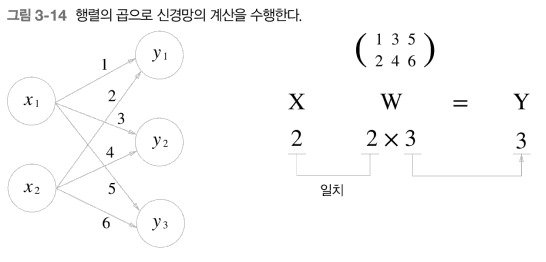
>
> numpy 행렬을 통해 신경망을 구현

In [46]:
# 행렬의 곱 구현
import numpy as np

X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2, 3)
[ 5 11 17]


## 입력층 -> 1층 신호전달
---
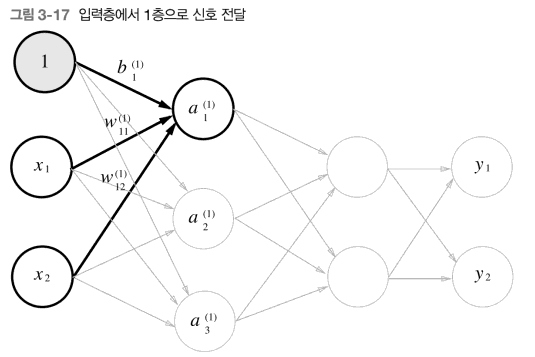

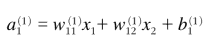

> a를 식으로 표현

<br>

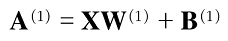

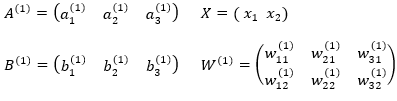
> 행렬의 곱으로 위 식처럼 간소화 가능

In [50]:
# 다차원 배열의 곱셈 구현
import numpy as np

X = np.array([1.0,0.5]) # 뉴런 2개
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]]) # 입력층(뉴런 2개) -> 1층의 뉴런(3개)
B1 = np.array([1.0, 0.2, 0.3]) # 편향 뉴런(1개) -> 1층 뉴런(3개)

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print()
print(A1)

(2,)
(2, 3)
(3,)

[1.2 0.7 1.1]


# 1층 활성화 함수 처리
---

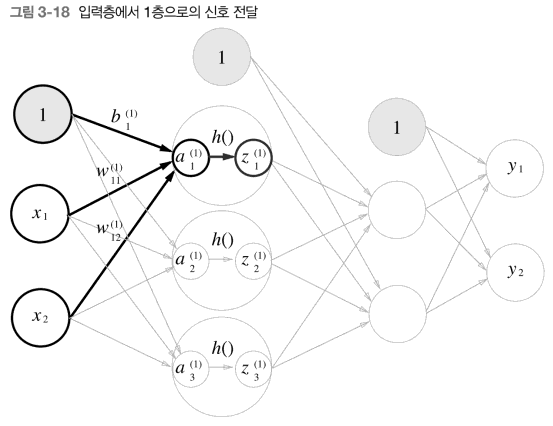
>
> 가중치 합을 a로 표현, 활성화 함수 h()로 변환된 신호 z로 표시

In [52]:
# 입력층 -> 1층 활성화 함수 처리
## sigmoid 사용
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


# 1층 -> 2층 신호전달
---

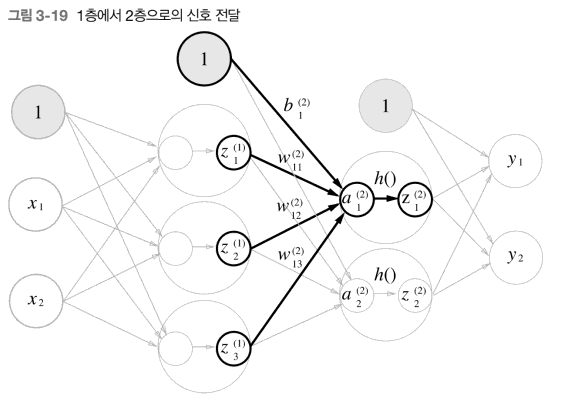

In [58]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 입력층 -> 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(Z1)

# 1층 -> 2층
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.57444252 0.66818777 0.75026011]
[0.62624937 0.7710107 ]


# 2층 -> 출력층 신호전달
---

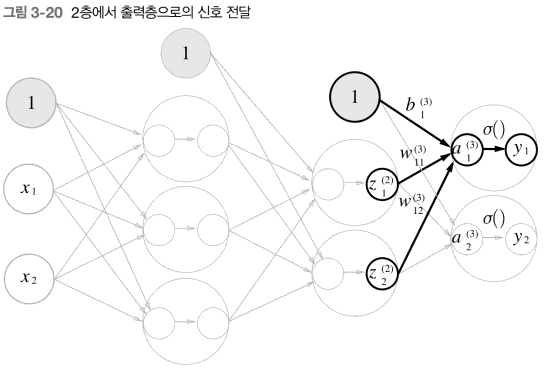

> 1층 -> 2층과 구현 동일

In [59]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 입력층 -> 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(Z1)

# 1층 -> 2층
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

# 2층 -> 출력층
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Z3 = sigmoid(A3)
print(Z3)

[0.57444252 0.66818777 0.75026011]
[0.62624937 0.7710107 ]
[0.57855079 0.66736228]


# 출력층 설계
---

> 신경망은 분류와 회귀에 모두 이용 가능
>
> 하지만 출력층에서는 사용하는 활성화 함수는 다름
> 
>> 회귀 : 항등함수 사용
>> 
>> 분류 : 소프트맥스 함수 사용
>
> 기계 학습 문제는 분류와 회귀로 나뉨
>> 분류 : 데이터가 어느 클래스에 속하는지의 문제
>> 
>> 회귀 : 입력 데이터에서 (연속적인)수치를 예측하는 문제

<br>
<br>
<br>

## 항등 함수와 소프트맥스 함수 구현
---

> 항등 함수(identity function)
>> 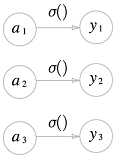
>>
>> 출력층에서 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 됌
>
> 소프트맥스 함수(softmax funtion)
>
>>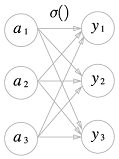
>>
>> 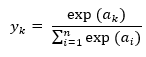
>>
>>
>> 분자 : 입력 신호 a_k의 지수 함수
>>
>> 분모 : 모든 입력 신호의 지수 함수의 합
>>> 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받음

In [61]:
import numpy as np

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


## 소프트맥스 함수 표현 시 문제점
---

> 위 코드를 계산 시 overflow가 발생할 수 있는 문제점 발생
>> 소프트맥스 함수는 지수 함수를 사용하기 때문에 값이 쉽게 커짐
>> 
>> 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해짐

<br>
<br>

> ### 개선
> 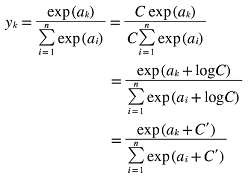
>
> 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 변경되지 않음
>
> 이 특성을 이용하여 C'에 입력 신호 중 최대값을 넣어서 계산
>> 작은 값을 얻음

In [69]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # e^(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
sum = np.sum(y)
print(sum)
# 항상 더한 값은 1이 나오는 것이 소프트맥스의 중요한 특성

[0.01821127 0.24519181 0.73659691]
1.0


# 손글씨 숫자 인식
---

> 기계학습의 문제풀이는 학습, 추론 두 단계를 거쳐야함
>
>>학습단계에서 모델을 학습하고 추론단계에서 앞서 학습한 모델로 미지의 데이터에 대해 추론을 수행
>
> 신경망도 두 단계를 거쳐 문제를 해결
>> 먼저 훈련 데이터를 사용해 가중치 매개변수를 학습하고, 추론 단계에서 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류

<br>
<br>

## MINST 데이터셋
---

Git Repo
* https://github.com/oreilly-japan/deep-learning-from-scratch.git

> 기계학습 분야에 사용하는 데이터셋
>> mnist.py에 정의된 load_mnist() 함수를 이용하여 데이터를 쉽게 가져올 수 있음

In [119]:
# Mnist image 가져오기
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# Mnist dataset load
(x_train, t_train), (x_test, t_test) = \
	load_mnist(flatten=True, normalize=False) 
# normalize : 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화할지 정함,
#             False시 입력 이미지의 픽셀 원래 값 그대로 0 ~ 255 유지

# flatten : 입력 이미지를 1차원 배열로 만들지 정함
#           False시 입력 이미지를 1x28x28의 3차원 배열로 저장
#           True시 784개의 원소로 이뤄진 1차원 배열로 저장

# one_hot_label : 레이블을 one-hot encoding 형태로 저장할지 선택
#                 False시 1,8등 숫자 형태로 레이블을 저장
#                 True시 레이블을 one-hot encoding하여 저장
#                  * one-hot encoding이란 0, 로 이루어진 백터로 표현 
#                  * 정답을 뜻하는 원소만 1(one-hot)이고 나머지는 0인 배열 
#                    ex) [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]   # 숫자 1

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [132]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

# 이미지 출력 함수
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # Numpy 배열을 8bit 이미지로 변환
    pil_img.show() # 이미지 출력

# 데이터셋 로드
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0] # 첫 번째 훈련 이미지
label = t_train[0] # 첫 번째 훈련 이미지의 정답
print(label)

print(img.shape) # 이미지 28x28 형태로 변환
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


# 신경망 추론 처리
---

> MNIST 데이터셋으로 추론을 수행하는 신경망 구현
>> 입력층 뉴런 784개, //28X28의 이미지 크기를 갖고 있어 784개
>>
>> 출력층 뉴런 10개로 구성 //0부터 9까지 숫자를 구분하기 때문에 10개

<br>
<br>

> 아래 코드 구조
>> 입력층 (784) → 은닉층1 (50) → 은닉층2 (100) → 출력층 (10)
>> 
>>    W1, b1  ------>       W2, b2   ------>      W3, b
>
><br>
>
> 데이터 구조
>
>> [입력 데이터 (784차원)]  
>>  
>> ▼  
>>  
>> [W1 (784×50)] 가중치 적용  
>>  
>> ▼  
>>  
>> [+ b1 (1×50)] 편향 추가  
>>  
>> ▼  
>>  
>> [활성화 함수 (Sigmoid)]  
>>  
>> ▼  
>>  
>> [은닉층1 (50개 뉴런)]   
>>  
>> ▼  
>>  
>> [W2 (50×100)] 가중치 적용  
>>  
>> ▼  
>>  
>> [+ b2 (1×100)] 편향 추가  
>>  
>> ▼  
>>  
>> [활성화 함수 (Sigmoid)]  
>>  
>> ▼  
>>  
>> [은닉층2 (100개 뉴런)]  
>>  
>> ▼  
>>  
>> [W3 (100×10)] 가중치 적용  
>>  
>> ▼  
>>  
>> [+ b3 (1×10)] 편향 추가  
>>  
>> ▼  
>>  
>> [활성화 함수 (Softmax)]  
>>  
>> ▼  
>>  
>> [출력층 (10개 뉴런)] → 확률값 10개 (0~9 숫자 중 가장 높은 확률 선택)  


In [151]:
import sys
import os
import numpy as np
import pickle


# 은닉층은 총 2개(50, 100으로 임의로 정한 값)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test # 테스트 데이터만 가져옴

# 신경망의 가중치와 편향 값을 로드
# 가중치는 "sample_weight.pkl" 파일에서 가져옴
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
              network = pickle.load(f) # pickle : 파이썬 객체를 파일로 저장하거나 불러옴
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    z3 = sigmoid(a3)
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i]) 
    p = np.argmax(y) # 확률이 가장 높은 클래스 선택
    if p == t[i]: # 정답과 비교
        accuracy_cnt += 1

print("Accurancy:" + str(float(accuracy_cnt) / len(x))) # 모델의 정확도 출력

Accurancy:0.9352


# 배치 처리
---

> 위 코드 형상
> 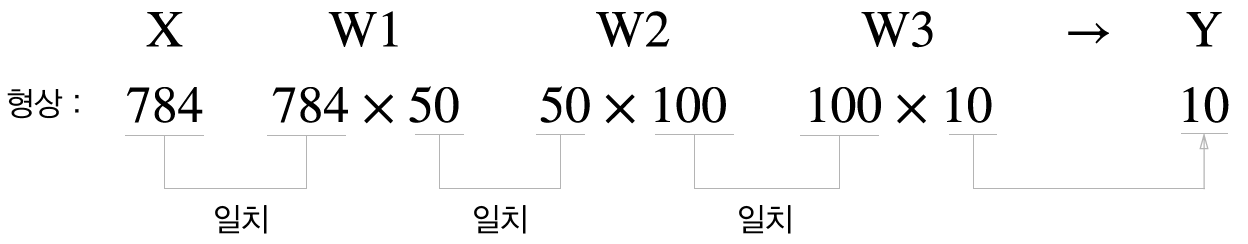
>
> 데이터 1장만 입력 경우

<br>

> 여러 장 입력
> 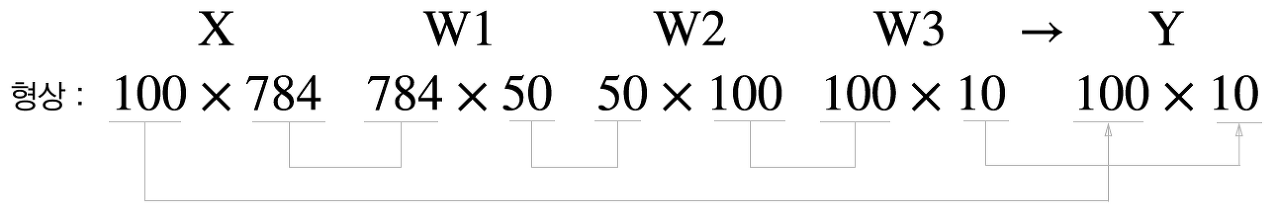
>
> 입력 데이터 100 x 784 -> 출력 데이터 100 x 10
>
>> 100장 분량의 입력 데이터의 결과가 한 번에 출력, 이렇게 하나로 묶은 입력 데이터를 배치라 칭함
>>
>> 이미지 1장당 처리 시간을 대폭 감소

In [157]:
x, t = get_data()
network = init_network()

batch_size = 100 # 100개씩 묶음을 위해 값 입력
accurancy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # range로 입력 데이터를 묶음
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 가장 큰 값을 가진 인덱스 선택
    accurancy_cnt += np.sum(p == t[i:i+batch_size])

print("Accurancy:" + str(float(accuracy_cnt) / len(x)))

Accurancy:0.9352


## y_batch 입력 값 예시
---

```python

y_batch = 

[

  [0.01, 0.02, 0.05, 0.90, 0.02, 0.03, 0.01, 0.01, 0.04, 0.02],  # 첫 번째 데이터 예측 (3)
  
  [0.02, 0.80, 0.01, 0.01, 0.05, 0.02, 0.03, 0.03, 0.02, 0.01],  # 두 번째 데이터 예측 (1)
  
  ...
]

p = [3, 1, 7, 0, 9, 4, ...]  # (100,)

